## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
### To read the csv data into Data frame Variable
ab_dataframe = pd.read_csv('ab_data.csv')
ab_dataframe.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
## To determine the number of records 
ab_dataframe.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
## To determine the number of unique users
ab_dataframe['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
## To determine the proportion of users converted
ab_dataframe['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
## To determine number of times the new_page and treatment don't line up.
ab_dataframe.query(' (group=="treatment" & landing_page != "new_page") | (group !="treatment" & landing_page == "new_page" ) ').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
## To determine missing values in the dataset.
ab_dataframe.isnull().any().any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# To create a new dataframe which has the right combination of entries for group and landing page :
#  treatment/newpage or control/old_page
df2 = ab_dataframe.query(' (group=="treatment" & landing_page == "new_page") | ( group =="control" & landing_page == "old_page") ')
print(df2.shape)


(290585, 5)


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# To derive the number of unique users
print(df2['user_id'].nunique())

290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Display the duplicate row entry 
df2[df2.duplicated(subset=['user_id'], keep='first')]
print(df2.query('user_id == 773192'))

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [12]:
#Row information is 2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#logic to drop duplcates and validat the record count
df2 = df2.drop_duplicates(subset=['user_id'])
print(df2.shape)

(290584, 5)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
## To determine the proportion of users converted
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
## To determine the proportion of users converted in control group
observed_mean_control = df2.query('group=="control"')['converted'].mean()
print(observed_mean_control)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
## To determine the proportion of users converted in treatment group
observed_mean_treatment = df2.query('group=="treatment"')['converted'].mean()
print(observed_mean_treatment)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
#To determine the probability of the pages
print(df2['landing_page'].value_counts(normalize=True))
print(df2['landing_page'].value_counts())

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64
new_page    145310
old_page    145274
Name: landing_page, dtype: int64


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**
# Based on the above observed data, it seems like existing page has better conversion rate, however to prove that by statistics - we need to perform A/B Test on the given data and then determine if new page has improved the conversion rate or not 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**<br>

Null Hypothesis:   **$p_{old}$** >=  **$p_{new}$** <br>
Alternative Hypothesis :  **$p_{old}$** <  **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
## To determine the proportion of users converted regardless of the page - which is Pnew
df2['converted'].mean()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
## To determine the proportion of users converted regardless of the page - which is Pnew
df2['converted'].mean()

0.11959708724499628

c. What is $n_{new}$?

In [20]:
#To determine the probability of the pages
print(df2['landing_page'].value_counts())

new_page    145310
old_page    145274
Name: landing_page, dtype: int64


d. What is $n_{old}$?

In [21]:
#To determine the probability of the pages
print(df2['landing_page'].value_counts())

new_page    145310
old_page    145274
Name: landing_page, dtype: int64


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Simulate the new transactions using random choice function with 1's and 0's
a=[0,1]
new_page_converted = np.random.choice(a,145310,p=[0.8804,0.1196])
print(new_page_converted.mean())

0.118505264607


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#Simulate the old transactions using random choice function with 1's and 0's
a=[0,1]
old_page_converted = np.random.choice(a,145274,p=[0.8804,0.1196])
print(old_page_converted.mean())

0.11850021339


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#compute the difference between new page and old page
Difference_mean = (new_page_converted.mean() - old_page_converted.mean() )
Difference_mean

5.0512168327382367e-06

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [25]:
#Simulate the null observations for 10000 times and capture the difference in array
p_diffs=[]
for k in range(10000):
    old_page_converted = np.random.choice(a,145274,p=[0.8804,0.1196])
    new_page_converted = np.random.choice(a,145310,p=[0.8804,0.1196])
    difference = ( new_page_converted.mean() - old_page_converted.mean() )
    p_diffs.append(difference)
print(p_diffs[0])

-0.000125872552705


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

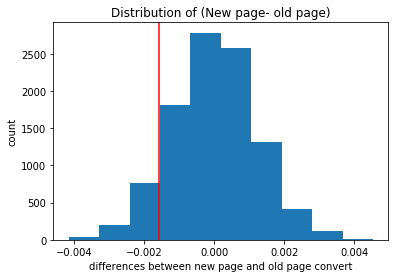

In [56]:
#plot the null observation differences in array
p_diffs = np.array(p_diffs)
#print(np.std(p_diffs))
plt.hist(p_diffs)
obs_diff = ( observed_mean_treatment - observed_mean_control)
#print(obs_diff)
plt.axvline(obs_diff,color='red')
plt.xlabel('differences between new page and old page convert')
plt.ylabel('count')
plt.title('Distribution of (New page- old page)')
#plt.axvline(-1*obs_diff,color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:



# compute the p-value based on single tail test 
print((p_diffs > obs_diff ).mean())

#compute the p-value based on two tailed test
print(((p_diffs < obs_diff ).mean()) * 2)

0.9053
0.1894


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.** <br>
<b>Value captured above is the p-value termed as -  probability of observing your statistic if null hypothesis is true.Since the above value is high and we fail to reject null hypothesis. Null hypothesis holds good</b>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2.query('group=="control" & converted==1')['converted'].count()
convert_new = df2.query('group=="treatment" & converted==1')['converted'].count()
n_old = 145274
n_new = 145310

C:\Users\varadharajan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [83]:

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
print(z_score)
print(p_value)

-1.31092419842
0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**<br>
<b> Z- Score -1.31  indicates that, observed point is well within the 95% confidence interval and negative sign indicates that - new value is less than the old value - the given data satisfies the null hypothesis. p-value computed above agree with the findings in part j and park k </b>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
We can use logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [61]:
#Copy the data to new frame df3.
df3=df2.copy()
#To get the dummy values for the landing page column and then drop the 
#old_page dummy column to maintain the consistency of columns with free rank and
#ensure there is independence 
df3[['ab_page','old_page']] = pd.get_dummies(df3['landing_page'])
df3['intercept']=1
df3=df3.drop(['old_page'], axis=1)
df3.head(5)
#df2.head(5)


,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [62]:
#To compute the logistic regression model
import statsmodels.api as sm
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results1 = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [63]:
# To provide the results summary
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        14:44:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [64]:
np.exp(results1.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [65]:
1/_

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.** <br>
<b> ab_page P value is 0.19 - which is statistically insignificant and this indicates that new page does not influence the conversion factor.<br>
In logistic regression,<br>
Null hypothesis : Response variable conversion does not depend on new page </br><br>
Alternate hypothesis : Response variable conversion depends on new page<br>
Thus there is two-tail test and hence ab_page P-value is different 
</b>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**<br>
<b>It is good idea to consider other factors influencing the individual converts because only then we can have the best prediction for the response variable. Also we can understand which explanatory variables best predict the response.<br> 
Disadvantage of adding additional terms is that - if the explanatory variables  are related to each other then regression model will not work as expected. Corelated errors, multicollinearity etc are few common issues when trying to build the multiple linear regression model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [66]:
# Inner join the country data with the ab_test_results page dataframe -df2
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()





,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [67]:
### Create the necessary dummy variables for country column
df_new[['ca','uk','us']] = pd.get_dummies(df_new['country'])
df_new['intercept']=1
df_new=df_new.drop(['us'], axis=1)
df_new.head(5)
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ca','uk']])
results2 = log_mod.fit()
results2.summary()
#df2.head(5)

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Dec 2017   Pseudo R-squ.:               1.521e-05
Time:                        14:50:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
ca            -0.0408      0.027     -1.518      0.129      -0.093       0.012
uk             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [69]:
np.exp(results2.params)


intercept    0.135779
ca           0.960018
uk           1.009966
dtype: float64

In [70]:
1/_

intercept    7.364925
ca           1.041647
uk           0.990133
dtype: float64

<b>Thus we can see that based on probability value (which is insignificant),countries - CA and UK - do not have any influence on the conversion factor.Considering US as reference - coefficient of 0.96,1.00 for Canada and UK  indicate that - they are almost same to that of USA </b>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [71]:
### Fit Your Linear Model And Obtain the Results
df_new.head()
df_new[['ab_page','old_page']] = pd.get_dummies(df_new['landing_page'])
df_new=df_new.drop(['old_page'], axis=1)
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'ca','uk']])
results3 = log_mod.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Dec 2017   Pseudo R-squ.:               2.323e-05
Time:                        14:53:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
ca            -0.0408      0.027     -1.516      0.130      -0.093       0.012
uk             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [84]:
np.exp(results3.params)

intercept    0.136795
ab_page      0.985168
ca           0.960062
uk           1.009932
dtype: float64

In [85]:
1/_

intercept    7.310207
ab_page      1.015056
ca           1.041599
uk           0.990165
dtype: float64

In [95]:
#To study the given data based on Country and conversion rate
# Inner join the country data with the ab_test_results page dataframe -df2
countries2_df = pd.read_csv('./countries.csv')
df_new2 = countries2_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_summary = df_new2.groupby(['country','converted'])['group'].count()
df_percentage = df_summary.groupby(level=0).apply(lambda x: x/x.sum() * 100)
print(df_percentage.head(10))

df_summary2 = df_new2.groupby(['landing_page','converted'])['group'].count()
df_percentage2 = df_summary2.groupby(level=0).apply(lambda x: x/x.sum() * 100)
print(df_percentage2.head(10))


country  converted
CA       0            88.468170
         1            11.531830
UK       0            87.940551
         1            12.059449
US       0            88.045320
         1            11.954680
Name: group, dtype: float64
landing_page  converted
new_page      0            88.119193
              1            11.880807
old_page      0            87.961370
              1            12.038630
Name: group, dtype: float64


Based on the above datastudy, we can see for all the three countries, conversion rate is about 11% (Same for all the countries) - which is clearly reflected in the logic regression model<br>
similarly for the landing_page, both new page and old page have the same conversion rate of 12%

<b>conclusion based on P column and coefficient value ,<br>
ab_page (New page) is not influencing the individual convert. Null hypothesis holds good <br>
Similarly countries are not influencing the individual convert.Null hypothesis holds good <br>


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.